# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project 1: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started
In this project, you will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preoprocessing steps have been made to the dataset:
- 16 data points have an `'MDEV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MDEV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MDEV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

Run the code cell below to load the Boston housing dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [17]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import visuals as vs # Supplementary code
from sklearn.cross_validation import ShuffleSplit

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MDEV']
features = data.drop('MDEV', axis = 1)
    
# Success
print "Boston housing dataset has {} data points with {} variables each.".format(*data.shape)

Boston housing dataset has 489 data points with 4 variables each.


## Data Exploration
In this first section of this project, you will make a cursory investigation about the Boston housing data and provide your observations. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand and justify your results.

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MDEV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

### Implementation: Calculate Statistics
For your very first coding implementation, you will calculate descriptive statistics about the Boston housing prices. Since `numpy` has already been imported for you, use this library to perform the necessary calculations. These statistics will be extremely important later on to analyze various prediction results from the constructed model.

In the code cell below, you will need to implement the following:
- Calculate the minimum, maximum, mean, median, and standard deviation of `'MDEV'`, which is stored in `prices`.
  - Store each calculation in their respective variable.

In [18]:
from IPython.display import display
display(prices.head())
display(features.head())

0    504000.0
1    453600.0
2    728700.0
3    701400.0
4    760200.0
Name: MDEV, dtype: float64

,RM,LSTAT,PTRATIO
0,6.575,4.98,15.3
1,6.421,9.14,17.8
2,7.185,4.03,17.8
3,6.998,2.94,18.7
4,7.147,5.33,18.7


In [32]:
# 1st attempt, where I used pandas stats functions rather then numpy ones.
# TODO: Minimum price of the data
# minimum_price = prices.min()

# TODO: Maximum price of the data
# maximum_price = prices.max()

# TODO: Mean price of the data
# mean_price = prices.mean()

# TODO: Median price of the data
# median_price = prices.median()

# TODO: Standard deviation of prices of the data
# std_price = prices.std()

# Show the calculated statistics
# print "Statistics for Boston housing dataset:\n"
# print "Minimum price: ${:,.2f}".format(minimum_price)
# print "Maximum price: ${:,.2f}".format(maximum_price)
# print "Mean price: ${:,.2f}".format(mean_price)
# print "Median price ${:,.2f}".format(median_price)
# print "Standard deviation of prices: ${:,.2f}".format(std_price)

In [33]:
# 2nd attempt: using numpy functions rather than the pandas equivalents
# noting that numpy std is different to pandas std (which has default ddof of 1 rather than numpy's 0).

# TODO: Minimum price of the data
minimum_price = np.min(prices)

# TODO: Maximum price of the data
maximum_price = np.max(prices)

# TODO: Mean price of the data
mean_price = np.mean(prices)

# TODO: Median price of the data
median_price = np.median(prices)

# TODO: Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print "Statistics for Boston housing dataset:\n"
print "Minimum price: ${:,.2f}".format(minimum_price)
print "Maximum price: ${:,.2f}".format(maximum_price)
print "Mean price: ${:,.2f}".format(mean_price)
print "Median price ${:,.2f}".format(median_price)
print "Standard deviation of prices: ${:,.2f}".format(std_price)

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


### Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of all Boston homeowners who have a greater net worth than homeowners in the neighborhood.
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.

_Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MDEV'` or a **decrease** in the value of `'MDEV'`? Justify your answer for each._  
**Hint:** Would you expect a home that has an `'RM'` value of 6 be worth more or less than a home that has an `'RM'` value of 7?

**Answer: **

- `'RM'` - **increase**. Intuitively, houses with more rooms tend to be larger and more expensive. A neighbourhood containing larger and more expensive houses is more likely to be affluent and considered as a desirable place to live. Desirability drives demand and therefore increases prices. Hence all other things being equal, for a house with given features, it is likely to cost more in an area where average number of house rooms is greater.

- `'LSTAT'` - ** decrease **. This is inversely related to the relative affluence of the area. A high value means the neighboorhood is less affluent than for a low value. As noted about, affluent areas are intuitively more desirable then less affluent ones, driving up prices. Hence an increase in LSTAT corresponds to a decrease in house price.
- `'PTRATIO'` ** decrease **. A low ratio of students to teachers is often seen as a desirable in terms of quality of schooling. Better quality of schooling is desirable and hence drives up prices. Hence an increase in the student-to-teacher ratios, corresponds to decrease in house price.


----

## Developing a Model
In this second section of the project, you will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

### Implementation: Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 always fails to predict the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. *A model can be given a negative R<sup>2</sup> as well, which indicates that the model is no better than one that naively predicts the mean of the target variable.*

For the `performance_metric` function in the code cell below, you will need to implement the following:
- Use `r2_score` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.
- Assign the performance score to the `score` variable.

In [21]:
# TODO: Import 'r2_score'
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

### Question 2 - Goodness of Fit
Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |
*Would you consider this model to have successfully captured the variation of the target variable? Why or why not?* 

Run the code cell below to use the `performance_metric` function and calculate this model's coefficient of determination.

In [22]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print "Model has a coefficient of determination, R^2, of {:.3f}.".format(score)

Model has a coefficient of determination, R^2, of 0.923.


**Answer:**
Yes I would consider the predictions to have captured the variation quite well. the predicted values are clearly closely aligned with the true values. The differences between true values and predictions are small relative to the range of the true values themselves.

The coefficient of determination R^2 of 0.923 supports this, since the range of R^2 can be between 0 and 1, where the higher the value, the lower the prediction error.



### Implementation: Shuffle and Split Data
Your next implementation requires that you take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, you will need to implement the following:
- Use `train_test_split` from `sklearn.cross_validation` to shuffle and split the `features` and `prices` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [23]:
# TODO: Import 'train_test_split'
from sklearn.cross_validation import train_test_split

# TODO: Shuffle and split the data into training and testing subsets
RANDOM_STATE = 371 # arbitrary value to set random seed
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=RANDOM_STATE)

# Success
print "Training and testing split was successful."
print len(features), len(prices)
print len(X_train), len(X_test), len(y_train), len(y_test)

Training and testing split was successful.
489 489
391 98 391 98


### Question 3 - Training and Testing
*What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?*  
**Hint:** What could go wrong with not having a way to test your model?

**Answer: **
It allows setting aside a portion of the data on which the model has not been trained, in order to assess it's performance, to see if the model generalises well to unseen data, and isn't overfit to the training set.

----

## Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded reigon of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

Run the code cell below and use these graphs to answer the following question.

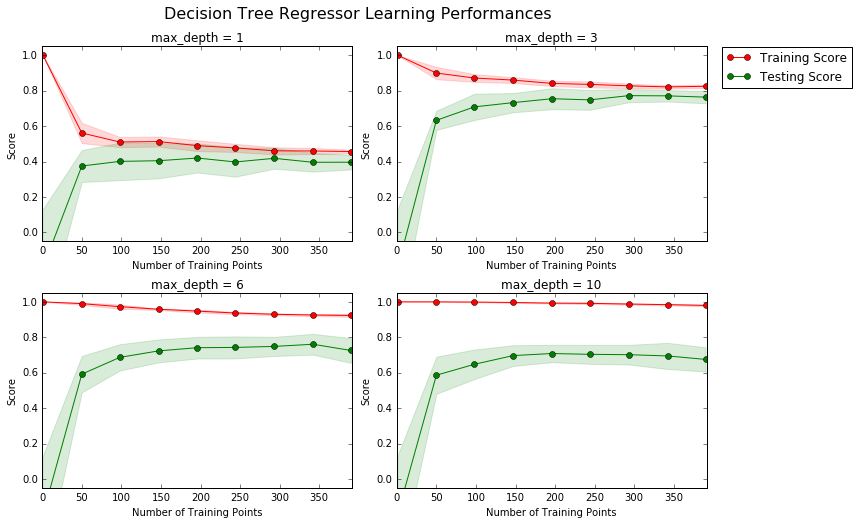

In [24]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

### Question 4 - Learning the Data
*Choose one of the graphs above and state the maximum depth for the model. What happens to the score of the training curve as more training points are added? What about the testing curve? Would having more training points benefit the model?*  
**Hint:** Are the learning curves converging to particular scores?

**Answer: **

For the **max_depth=3** chart:

 - the score of the ** training ** curve initially **decreases** as more training points are added, but then flattens out, and remains approximately constant at just over 0.8 $R^2$ score.
 - the score of the ** testing ** curve **increases** as more training points are added, but also flattens out at just under 0.8 $R^2$ score.
 - Intuitively, adding more training points, is always a good thing, so it may help **slightly**. However, in this particular case, the curves have already converged very close together, to around the 0.8 $R^2$ score, and so the performance would not be expected to improve by very much. i.e. unlikely to significantly exceed an 0.8 $R^2$ score.

### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

Run the code cell below and use this graph to answer the following two questions.

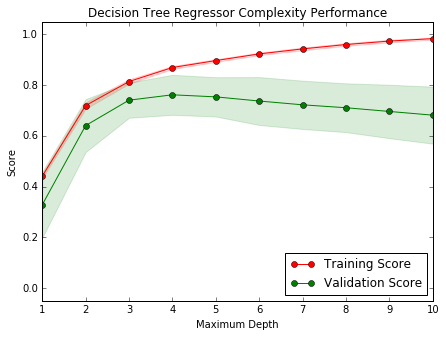

In [25]:
vs.ModelComplexity(X_train, y_train)

### Question 5 - Bias-Variance Tradeoff
*When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?*  
**Hint:** How do you know when a model is suffering from high bias or high variance?

**Answer: **

- for max depth = 1, the model suffers from high bias. Visual cues, in this case, are that training and validation set performances are similar, but both rather poor, suggesting that the model is too simple, and is an over simplified model of the data.
- for max depth = 10, the model suffers from high variance. The cues to indicate this, are that the training set performance is very good, but the validation set performance, is much lower, and has in fact decreased, relative to that for simpler models. This suggests that the model is overfitting the training data set, and is thus a high variance model.



### Question 6 - Best-Guess Optimal Model
*Which maximum depth do you think results in a model that best generalizes to unseen data? What intuition lead you to this answer?*

**Answer: **

- max depth = **4**, should be the best generalising model. The fact that the curve of validation set performance has it's maximum for this max depth value, is the indicator that it's the best generalising model. (Validation set testing is used exactly for this purpose, to see how well the model performs on data other than that on which is was trained. i.e. how well it generalises.)

-----

## Evaluating Model Performance
In this final section of the project, you will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

### Question 7 - Grid Search
*What is the grid search technique and how it can be applied to optimize a learning algorithm?*

**Answer: **

- grid search is the process of automatically evaluating a model with different sets of model parameters, to determine the best combination, based on some particular evaluation metric. Typically the list of parameters to test, and the list of values of each to consider are specified, and a grid search algorithm will try each combination of parameter values in turn, to see which yields the best scoring model.



### Question 8 - Cross-Validation
*What is the k-fold cross-validation training technique? What benefit does this technique provide for grid search when optimizing a model?*  
**Hint:** Much like the reasoning behind having a testing set, what could go wrong with using grid search without a cross-validated set?

**Answer: **

- k-fold cross validation is a technique whereby the dataset is partitioned into $k$ approximately equal sized parts. $k$ training sessions are then undertaken, in each one, 1 slice of the data is held out as a validation set, and the remainder is used as the training set. Each time, a different slice is used as the validation set, so that after $k$ sessions, all of the data has been used as both training and testing data. The validation set performance of the model, is typically then reported as the average of the validation set performances over the $k$ sessions.
- the benefit of this technique for grid search, is that it makes full use of all of the data for training, whilst still evaluating model performance on data that was unseen during the current training session. That is, the model parameters are selected by the grid search on the basis of the model's performance at generalising to unseen data.
- That being said, after k-fold cross validation has been used to select model parameters, the validation set performance can no longer be considered an unbiased estimate of performance on unseen data, since it was used to select the parameters. Hence it's common to hold out a separate test set of data to evaluate final model performance.

### Implementation: Fitting a Model
Your final implementation requires that you bring everything together and train a model using the **decision tree algorithm**. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called *supervised learning algorithms*.

For the `fit_model` function in the code cell below, you will need to implement the following:
- Use [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) from `sklearn.tree` to create a decision tree regressor object.
  - Assign this object to the `'regressor'` variable.
- Create a dictionary for `'max_depth'` with the values from 1 to 10, and assign this to the `'params'` variable.
- Use [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) from `sklearn.metrics` to create a scoring function object.
  - Pass the `performance_metric` function as a parameter to the object.
  - Assign this scoring function to the `'scoring_fnc'` variable.
- Use [`GridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html) from `sklearn.grid_search` to create a grid search object.
  - Pass the variables `'regressor'`, `'params'`, `'scoring_fnc'`, and `'cv_sets'` as parameters to the object. 
  - Assign the `GridSearchCV` object to the `'grid'` variable.

In [26]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor(random_state=RANDOM_STATE)

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth': [i+1 for i in xrange(10)] }

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search object
    grid = GridSearchCV(
        estimator=regressor, 
        param_grid=params,
        scoring=scoring_fnc,
        cv=cv_sets,
        verbose=0)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

### Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a *decision tree regressor*, the model has learned *what the best questions to ask about the input data are*, and can respond with a prediction for the **target variable**. You can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

### Question 9 - Optimal Model
_What maximum depth does the optimal model have? How does this result compare to your guess in **Question 6**?_  

Run the code block below to fit the decision tree regressor to the training data and produce an optimal model.

In [27]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print "Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth'])

Parameter 'max_depth' is 4 for the optimal model.


**Answer: **

- the optimal 'max_depth' is 4.
- this matches the guess from question 6.


### Question 10 - Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Household net worth (income) | Top 34th percent | Bottom 45th percent | Top 7th percent |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |
*What price would you recommend each client sell his/her home at? Do these prices seem reasonable given the values for the respective features?*  
**Hint:** Use the statistics you calculated in the **Data Exploration** section to help justify your response.  

Run the code block below to have your optimized model make predictions for each client's home.

In [28]:
# Produce a matrix for client data
client_data = [[5, 34, 15], # Client 1
               [4, 55, 22], # Client 2
               [8, 7, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print "Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price)

Predicted selling price for Client 1's home: $418,813.04
Predicted selling price for Client 2's home: $227,126.67
Predicted selling price for Client 3's home: $934,850.00


In [29]:
# quick look at the stats again, as above:
display(prices.describe())
(reg.predict(client_data) - prices.mean()) / np.std(prices)

count    4.890000e+02
mean     4.543429e+05
std      1.653403e+05
min      1.050000e+05
25%      3.507000e+05
50%      4.389000e+05
75%      5.187000e+05
max      1.024800e+06
Name: MDEV, dtype: float64

array([-0.21510963, -1.37564159,  2.90914672])

**Answer: **

I would recommend the following selling prices: (these are the models predictions rounded to the nearest 100USD, to match the training data)
- Client 1's home: $418,800.00

- Client 2's home: $227,100.00

- Client 3's home: $934,900.00


These seem reasonable, for the following reasons:
- they are within the observed range of the existing price data, and are within +-3 std deviations of the mean.
- Relative to one another they appear to be ranked consistently based on their features. i.e for each feature, the rank ordering of the feature values associated with higher pricing, is from lowest to highest, on client 2's home, followed by client 1's home, followed by client 3's home. This matches the rank ordering of the predicted prices of the homes.


### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. Run the code cell below to run the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with the data it's trained on.

In [30]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $324,240.00
Trial 2: $324,450.00
Trial 3: $346,500.00
Trial 4: $420,622.22
Trial 5: $302,400.00
Trial 6: $411,931.58
Trial 7: $344,750.00
Trial 8: $407,232.00
Trial 9: $352,315.38
Trial 10: $316,890.00

Range in prices: $118,222.22


In [34]:
# price range in above sensitivity illustration in stddevs.
118222.22 / 165171.13

0.7157559556564153

### Question 11 - Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

**Answer: **

No, the model is not suitable for use in a real-world setting in it's present state.
Reasons to be cautious interpreting it's results include:
 - the age of the data. This data is from 1978. Although some attempt was made to extrapolate to present day prices, there are all manner of other things that have changed in this time which may influence house pricing overall, and the relationship between any given set of features, and house pricing. e.g. the state of the economy, taxation rules, cost of borrowing, heating and energy costs etc. It would not be realistic to assume that the relationship between any given features and pricing would follow the same trends as over 30 years ago.
 - the features in the data set are not really sufficient to describe a home. Features such as state repair/renovation, presence or absence of regular and more luxury features such as garage/garden/balcony/swimming pool, quality of fixtures and fittings, more detailed location information such as ease of commute to major employment centers, etc. all may have significant effects on pricing, to similar or greater degrees than some of the features used here.
 - The model in its present form, seems somewhat sensitive. The sensitivity illustration above resulted in a predicted price that varied in a range of around 0.7 standard deviations of the whole price set. i.e. it's a somewhat noisy result, so can't be relied upon to be particularly precise.
 - data collected in an urban city such as Boston is unlikely to be particularly applicable to a rural setting. The demographics of rural versus urban dwellers are likely to be quite different, and their needs and concerns when purchasing a property very different as well. As an example, in the city, proximity to public transport may be more of a concern than fast access to highways. As another example, the density of schools may be significantly different, to the extent that whilst pupil to teacher ratio of the most local school may be a significant factor in Boston; in less densely populated rural areas, proximity to the nearest school, or to a school bus route may be more of a concern, if schools are much further apart.